In [7]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import re
params={
        'axes.labelsize':20,
        'xtick.labelsize':'large',
        'ytick.labelsize':'large',
        'xtick.direction':'in',
        'ytick.direction':'in',
        'xtick.minor.visible':True,
        'ytick.minor.visible':True,
        'xtick.top':True,
        'ytick.right':True,
        'xtick.labeltop':False,
        'ytick.labelright':False,
        'xtick.labelbottom':True,
        'ytick.labelleft':True,
        'xtick.major.size':10,
        'ytick.major.size':10,
        'xtick.minor.size':5,
        'ytick.minor.size':5,
        'xtick.major.width':1.5,
        'ytick.major.width':1.5,
        'xtick.minor.width':1,
        'ytick.minor.width':1,
        'errorbar.capsize':3,
        'legend.fontsize':'xx-large',
        'font.family':'serif',
        'mathtext.default':'it',
        'figure.subplot.wspace':0}
plt.rcParams.update(params)
%matplotlib widget

def extract_number(s):
    return float(re.search(r'\d+\.?\d*', s).group())

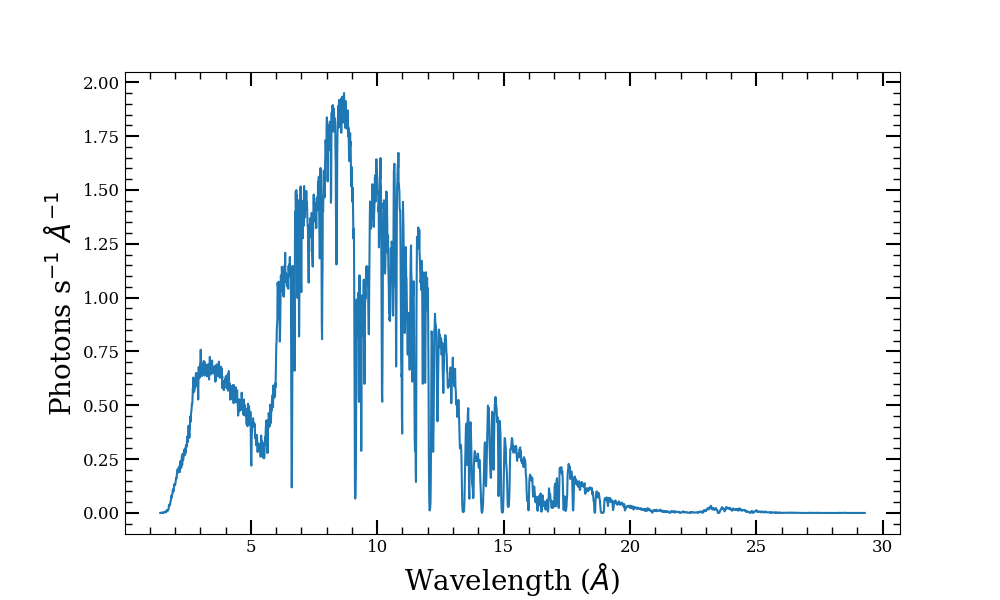

In [208]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-1/ang.qdp', skip_header=8)
x=data[:,0]
y=data[:,3]

plt.figure(figsize=(10, 6))
# plt.xlim(6.7,7.3)
# plt.xscale('log')
# plt.ylim(1e-3,1e3)
# plt.yscale('log')
plt.plot(x, y)
plt.xlabel('Wavelength ($\AA$)')
# plt.xlabel('Energy (keV)')
# plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
# plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$')
plt.ylabel('Photons s$^{-1}$ $\AA^{-1}$')
# plt.ylabel('Photons s$^{-1}$ keV$^{-1}$')
# plt.legend()
plt.savefig('ang.png',dpi=300)
plt.show()

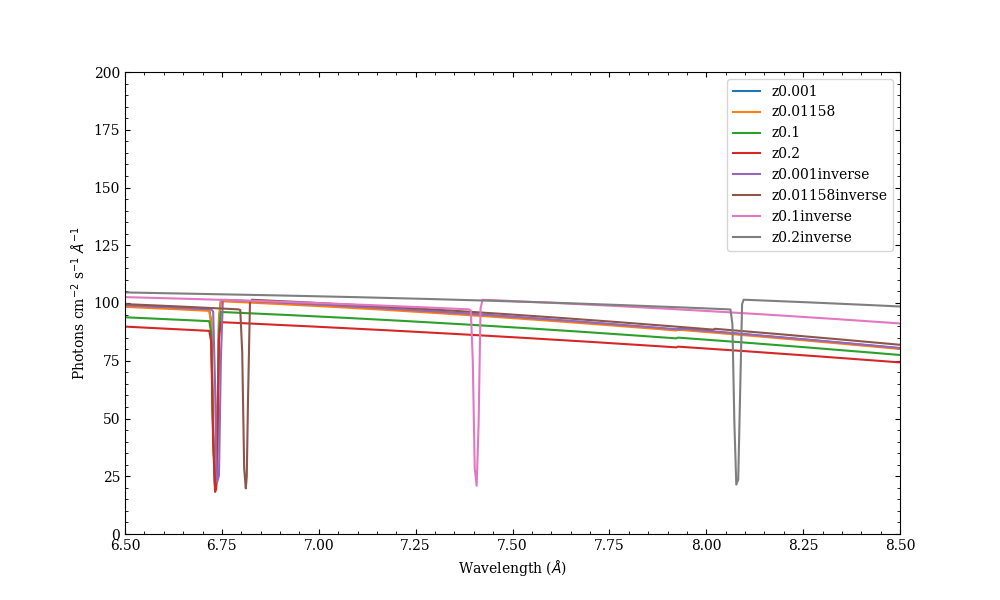

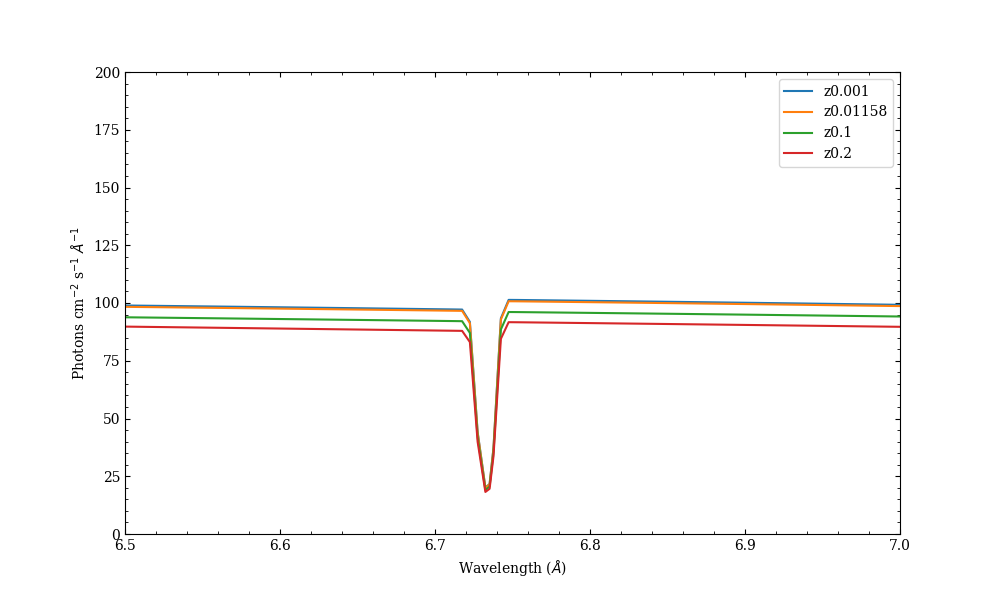

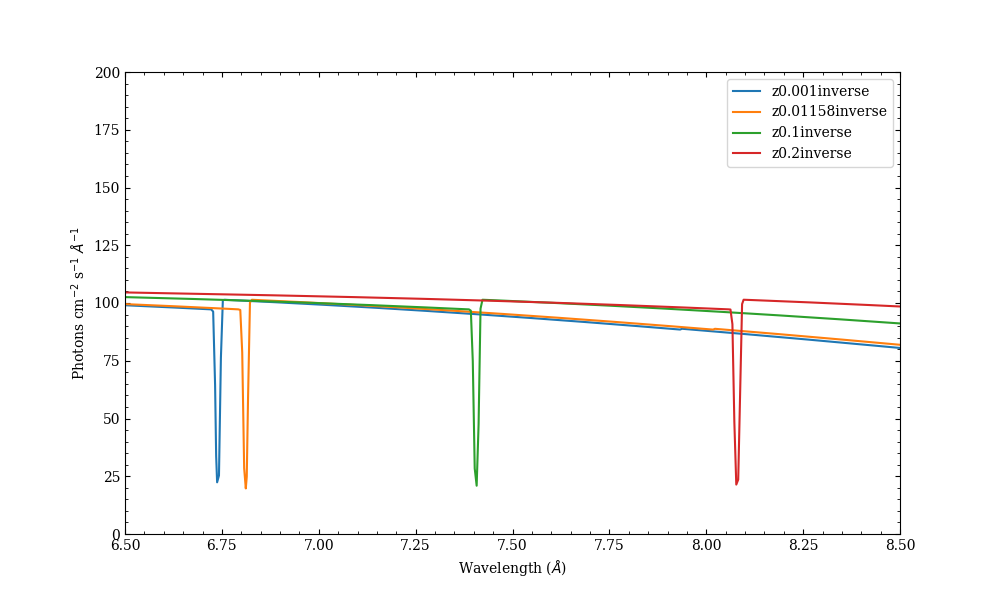

In [79]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/z_order'
filenames = os.listdir(folder_path)
inverse_filenames = [f for f in filenames if 'inverse' in f]
non_inverse_filenames = [f for f in filenames if 'inverse' not in f]
sorted_inverse_filenames = sorted(inverse_filenames, key=extract_number)
sorted_non_inverse_filenames = sorted(non_inverse_filenames, key=extract_number)
filenames = sorted_non_inverse_filenames + sorted_inverse_filenames
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(6.5,8.5)
# plt.xscale('log')
plt.ylim(0,2e2)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,7)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_non_inverse.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,8.5)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2),len(filenames)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_inverse.png',dpi=300)
plt.show()

 
6.731 x + 0.001487


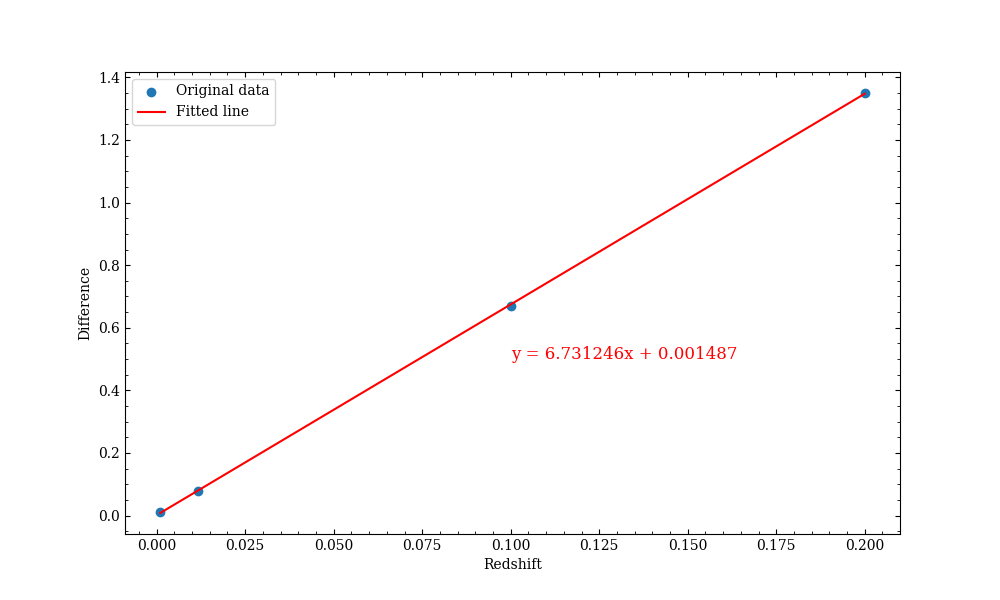

In [85]:
z = [0.001,0.01158,0.1,0.2]
delta = [0.01,0.08,0.67,1.35]

# 使用 numpy 的 polyfit 函数进行拟合，这里我们拟合一个一次多项式（线性拟合）
coefficients = np.polyfit(z, delta, 1)

# 使用 numpy 的 poly1d 函数得到多项式的表达式
polynomial = np.poly1d(coefficients)

# 打印多项式的表达式
print(polynomial)

# 生成拟合线的 x 和 y 坐标
z_fit = np.linspace(min(z), max(z), 100)
delta_fit = polynomial(z_fit)

# 绘制原始数据和拟合线
plt.figure(figsize=(10, 6))
plt.scatter(z, delta, label='Original data')
plt.plot(z_fit, delta_fit, color='red', label='Fitted line')
plt.text(0.1, 0.5, 'y = {:.6f}x + {:.6f}'.format(coefficients[0], coefficients[1]), fontsize=12, color='red')
plt.xlabel('Redshift')
plt.ylabel('Difference')
plt.legend()
plt.savefig('z_delta.png', dpi=300)
plt.show()

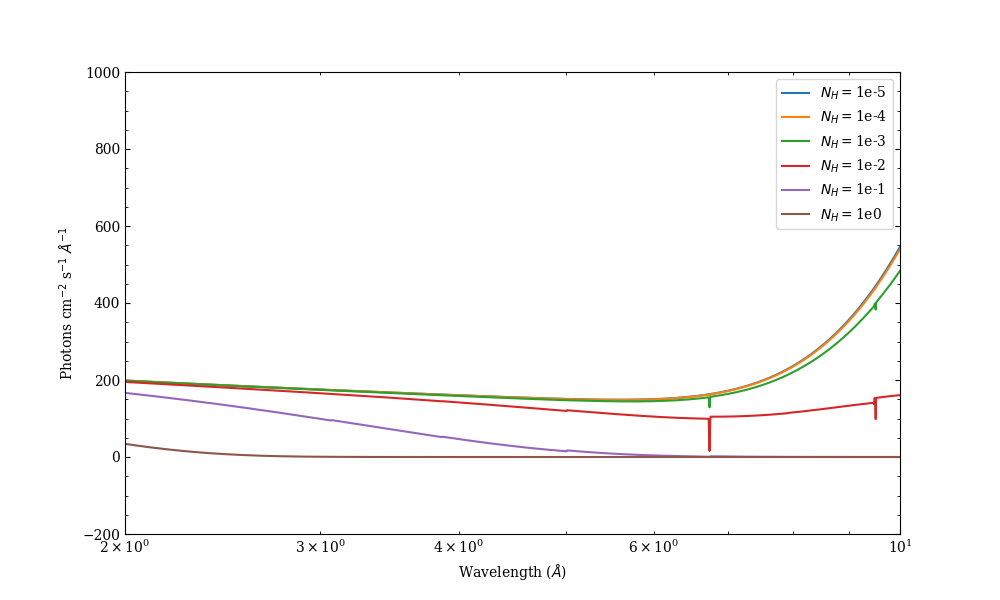

In [38]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/nh-new'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(2,10)
plt.xscale('log')
plt.ylim(-200,1000)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, 10**y, label='$N_H=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_NH-1.png',dpi=300)
plt.show()

['1e-6.qdp', '1e-5.qdp', '1e-4.qdp', '1e-3.qdp', '1e-2.qdp', '1e-1.qdp']


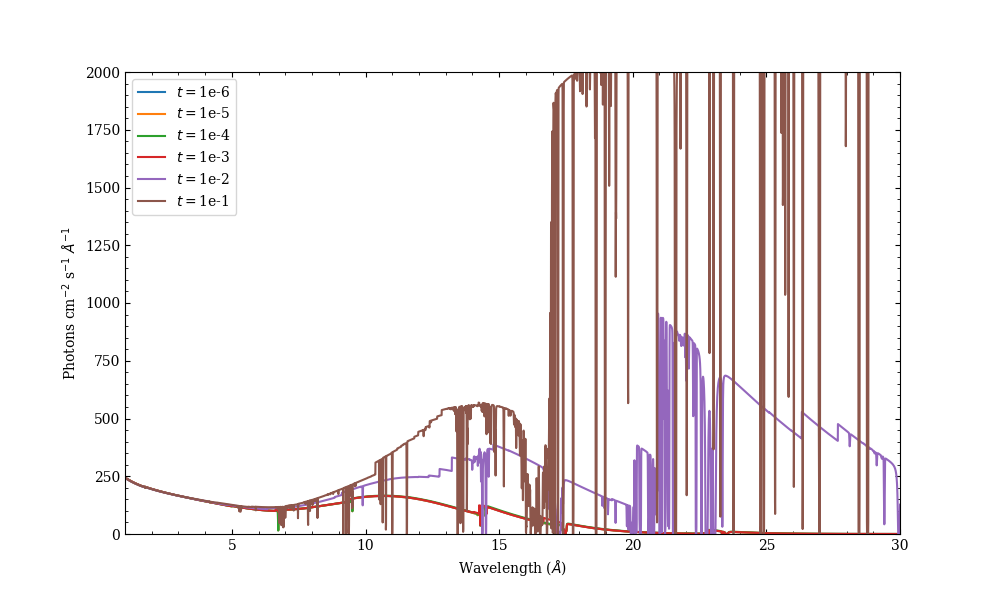

In [71]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/t'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
# filenames=filenames[:-1]
print(filenames)
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(1,30)
# plt.xscale('log')
plt.ylim(0,2000)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$t=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_t.png',dpi=300)
plt.show()

In [78]:
import numpy as np
np.sqrt(2.67E+37/(4*np.pi*2.136013E-08))

9.973526659930643e+21

In [79]:
import astropy.constants as const
import astropy.units as u

In [169]:
(const.h*const.c/(91.13*u.nanometer)).to(u.keV)

<Quantity 0.0136052 keV>

In [92]:
(const.h*const.c*const.Ryd).to(u.keV)

<Quantity 0.01360569 keV>

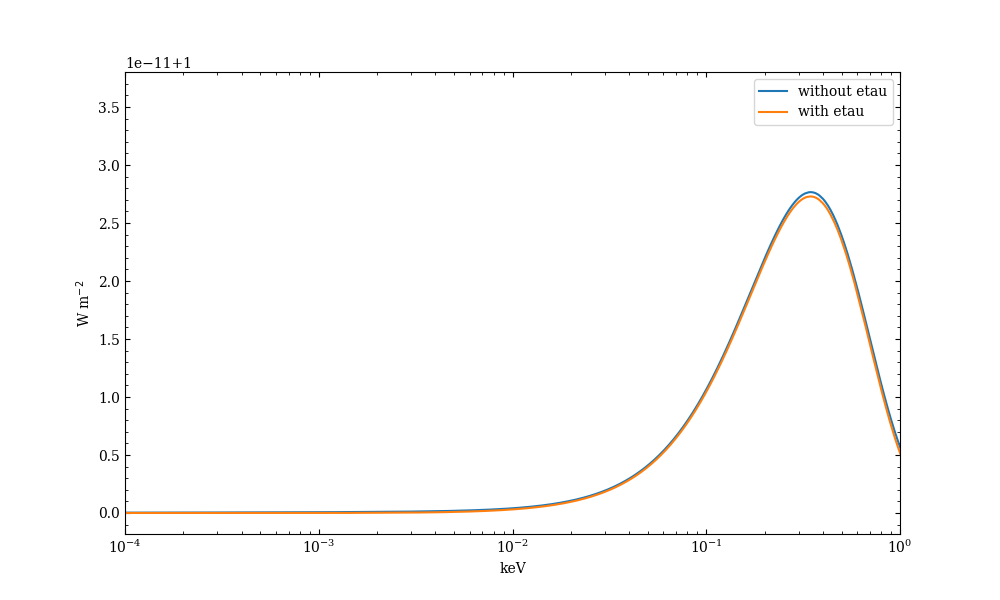

In [174]:
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(1e-4,1e0)
plt.xscale('log')
# plt.ylim(0,5)
# 读取每个文件
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/sed.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
plt.plot(x, 10**y, label='without etau')
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/sed-new.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
plt.plot(x, 10**y, label='with etau')
plt.xlabel('keV')
plt.ylabel('W m$^{-2}$')
plt.legend()
plt.savefig('sed.png',dpi=300)
plt.show()

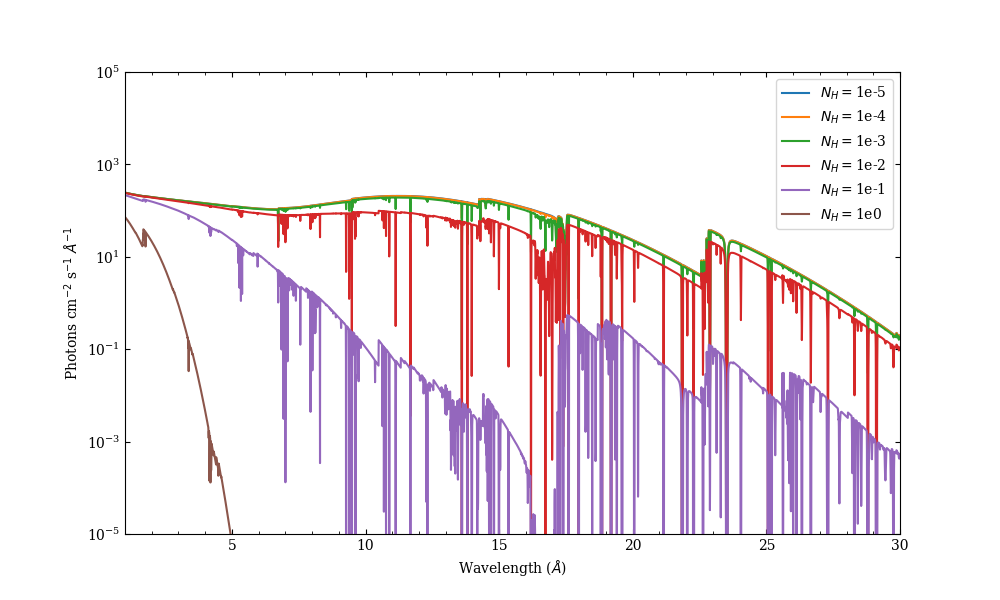

In [179]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pion-nh'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
# filenames=filenames[:-2]
plt.figure(figsize=(10, 6))
plt.xlim(1e0,30)
# plt.xscale('log')
plt.ylim(1e-5,1e5)
plt.yscale('log')
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$N_H=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_NH-1.png',dpi=300)
plt.show()

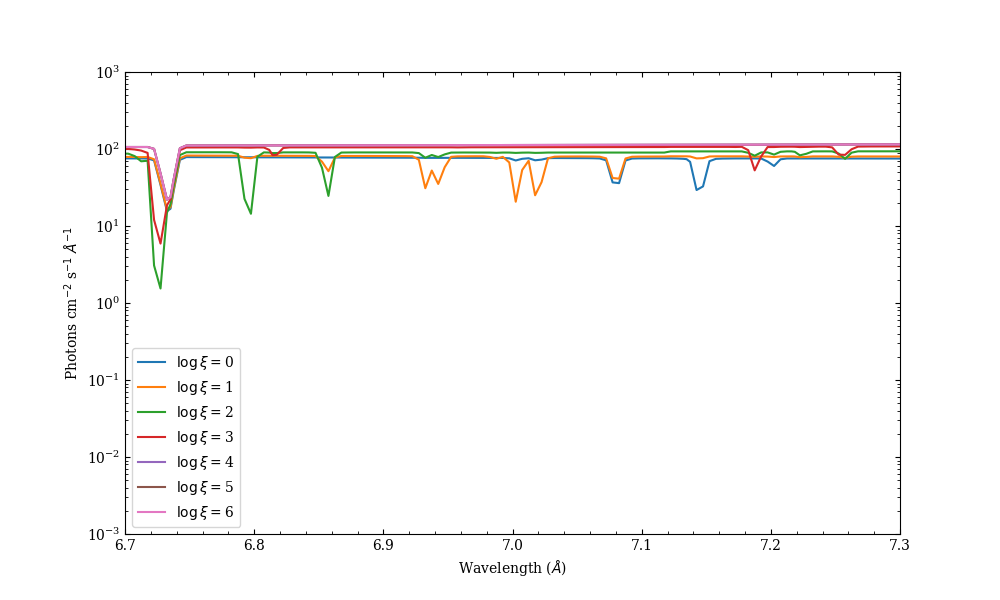

In [191]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pion-logxi'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
# filenames=filenames[4:]
plt.figure(figsize=(10, 6))
plt.xlim(6.7,7.3)
# plt.xscale('log')
plt.ylim(1e-3,1e3)
plt.yscale('log')
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$\\log \\xi=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_NH-1.png',dpi=300)
plt.show()

[[ 1.417500e+00  7.499982e-03 -7.499982e-03 -4.939227e+01  0.000000e+00
   0.000000e+00  2.248405e+02  4.939227e+01]
 [ 1.432500e+00  7.499982e-03 -7.499982e-03  0.000000e+00  0.000000e+00
   0.000000e+00  2.217856e+02  0.000000e+00]
 [ 1.447500e+00  7.500019e-03 -7.500019e-03  5.589693e+02  4.215768e+02
  -4.215768e+02  2.195593e+02  3.723029e+01]]


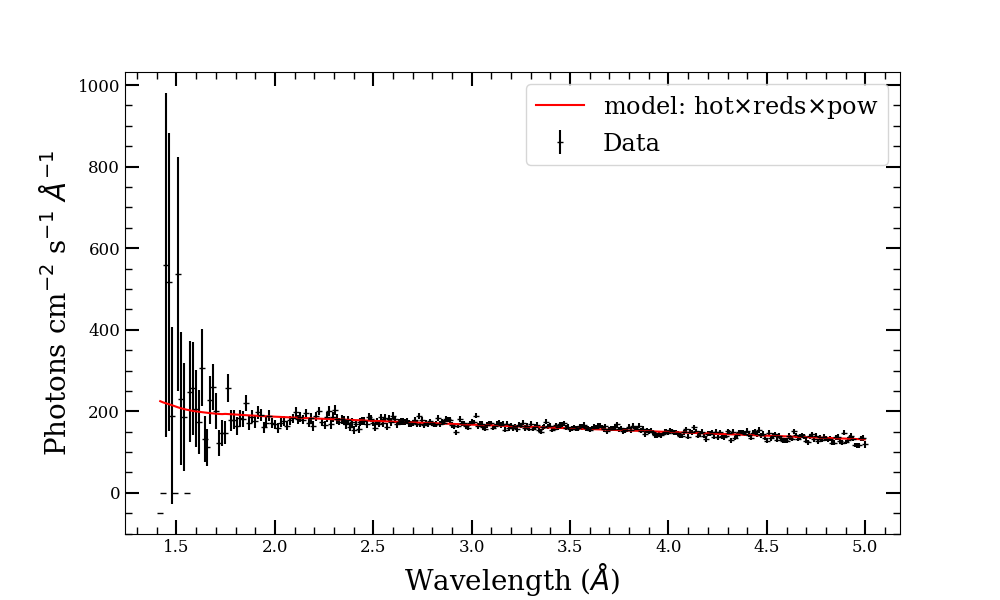

In [26]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-2-1.qdp', skip_header=8)
x=data[:,0]
y1=data[:,3]
y1_err1=data[:,4]
y1_err2=data[:,5]
y2=data[:,6]
print(data[0:3])

plt.figure(figsize=(10, 6))
plt.errorbar(x, y1, yerr=[abs(y1_err2), y1_err1], fmt='_', capsize=0, color='black', label='Data', markersize=5)
# plt.plot(x,y1,label='Data')
plt.plot(x,y2,color='red',label='model: hot$\\times$reds$\\times$pow')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('5-2-1.png',dpi=300)
plt.show()

In [5]:
import astropy.constants as const
import astropy.units as u

(0.001*u.eV/const.k_B).to(u.K)

<Quantity 11.60451812 K>

In [6]:
(const.h*const.c/(21.6*u.angstrom)).to(u.keV)

<Quantity 0.57400092 keV>